# Advanced Statistical Inference -- Bayesian inference for a coin tossing experiment


The beta probability density function is defined as:

$$
p(r \vert \alpha, \beta) = \dfrac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}r^{\alpha-1}(1-r)^{\beta-1} 
$$

where $0 \le r \le 1$ and $\alpha, \beta> 0$.
You can use the `plot_beta()` function.


In [1]:
from scipy.stats import beta
from scipy.special import gamma as gamma_func
from scipy.special import comb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_beta(a,b, plot=False):
    plt.figure(figsize=(15,5))
    x = np.linspace(0, 1, 1000)
    plt.plot(x, beta.pdf(x, a, b),'r')
    plt.title("beta pdf: alpha=" + str(a) + " beta=" + str(b))
    plt.show()

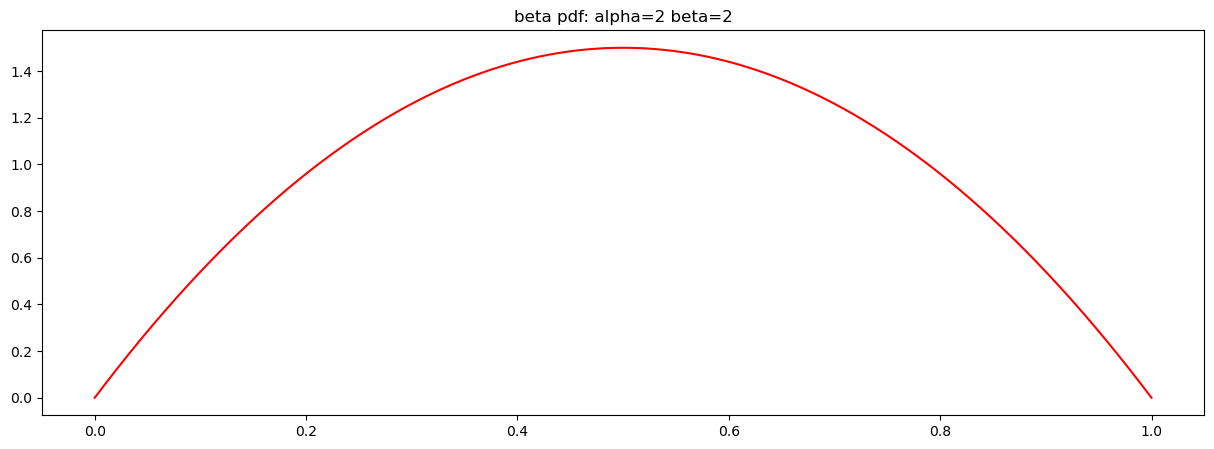

In [3]:
plot_beta(a=2, b=2)

**Exercise:**
$r$ is the probability of some hypothetical coin landing heads. The beta distribution is a suitable prior distribution for $r$. Choose 2 different pairs of values $\alpha$ and $\beta$ and plot the corresponding densities. For both cases, describe the possible beliefs they encode about the coin. Note, there is no ‘right’ answer here, just think about how likely different values of $r$ are in your densities and how this reflects on the coin.


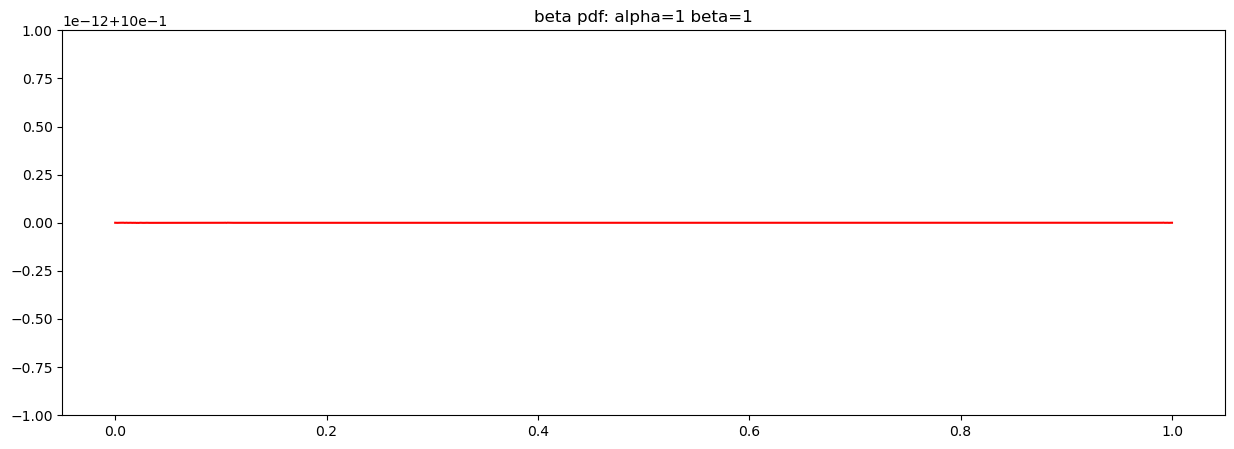

In [4]:
plot_beta(a=1, b=1)

Observe how the distribution changes for different values of 'a' and 'b', and comment on your results.


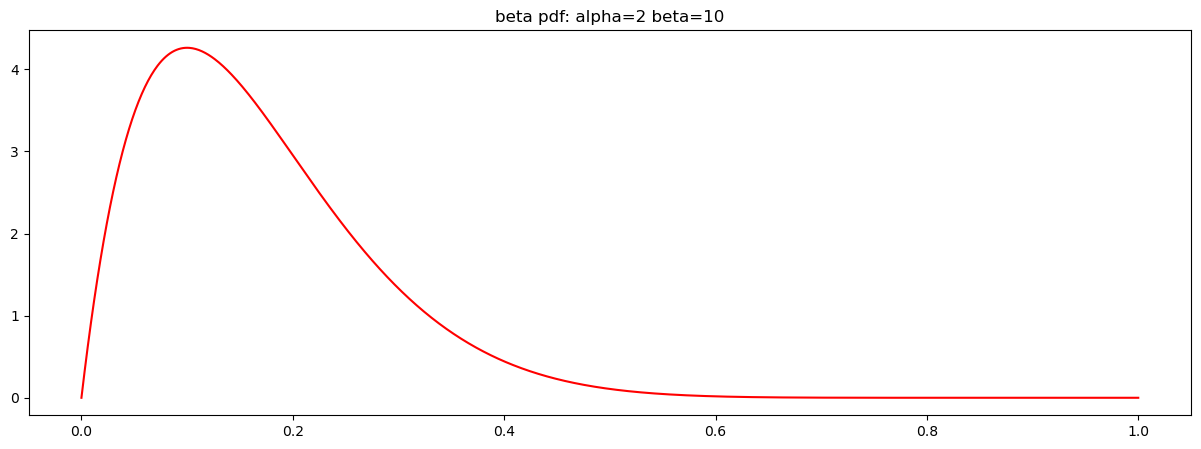

In [5]:
plot_beta(a=2,b=10) # TO COMPLETE

**Exercise:**
`coin1()` and `coin2()` are two ‘coins’ that you can use. In either case, calling the function with an argument N tosses the coin N times and returns the number of heads. Pick either one and using the equations we derived in the class, along with any choice for $\alpha$ and $\beta$, plot the posterior density for $r$ after $N = 1, 5, 10, 100$ tosses. Use `plot_beta()` to do the plotting. You can put them all on one plot or all on separate plots. Explain what you see.


In [6]:
def coin1(N):
    return sum(np.random.random(N)<=0.3)
def coin2(N):
    return sum(np.random.random(N)<=0.8)

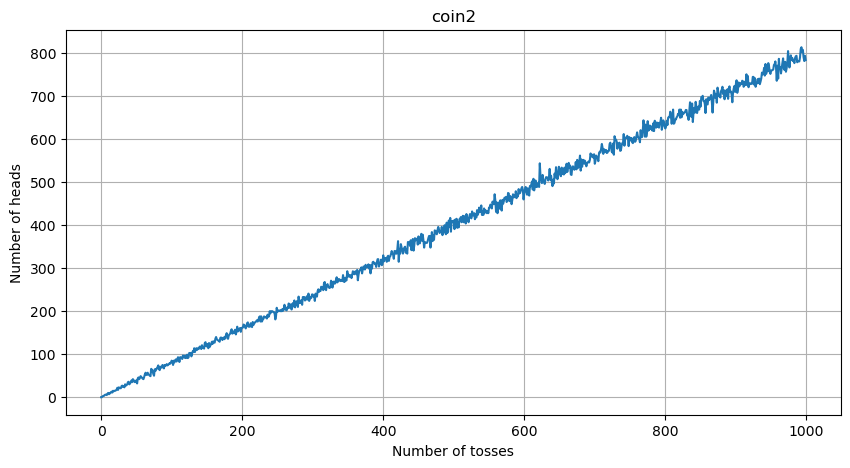

In [7]:
yN = [coin2(N) for N in range(1000)]
plt.figure(figsize=(10,5))
plt.plot(list(range(1000)), yN)
plt.xlabel("Number of tosses")
plt.ylabel("Number of heads")
plt.title("coin2")
plt.grid()
plt.show()

So, `coin2()` is biased to generate more heads (roughly 8 out of 10).

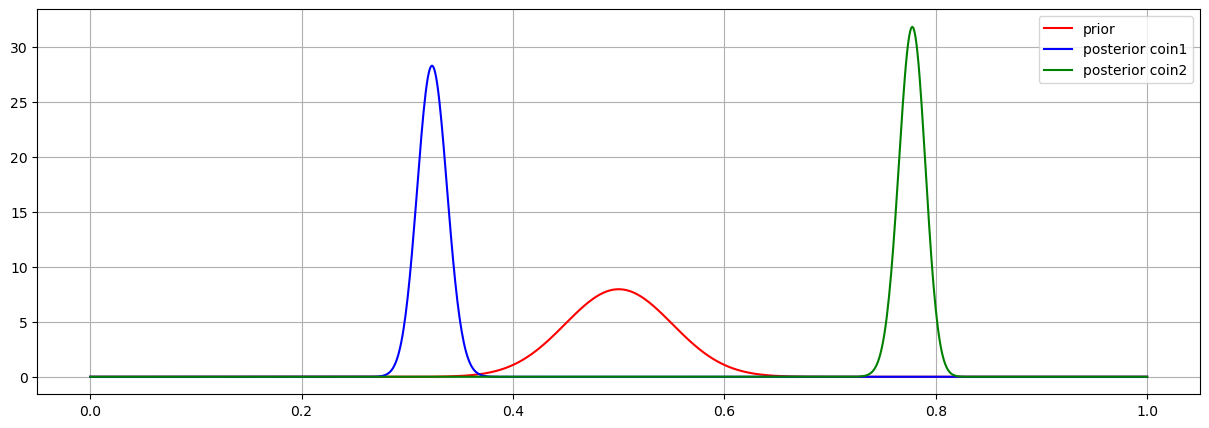

In [8]:
N = 1000

yN1, yN2 = coin1(N), coin2(N)

# Assume coins are fair

alpha1 = 50
beta1 = 50

# Compute the posterior 'gamma' and 'delta' parameters
gamma1, gamma2 = yN1 + alpha1, yN2 + alpha1
delta1, delta2 = beta1 + N - yN1, beta1 + N - yN2

plt.figure(figsize=(15,5))
x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, alpha1, beta1),'r', label='prior')
plt.plot(x, beta.pdf(x, gamma1, delta1),'b', label='posterior coin1')
plt.plot(x, beta.pdf(x, gamma2, delta2),'g', label='posterior coin2')
plt.legend()
plt.grid()
plt.show()

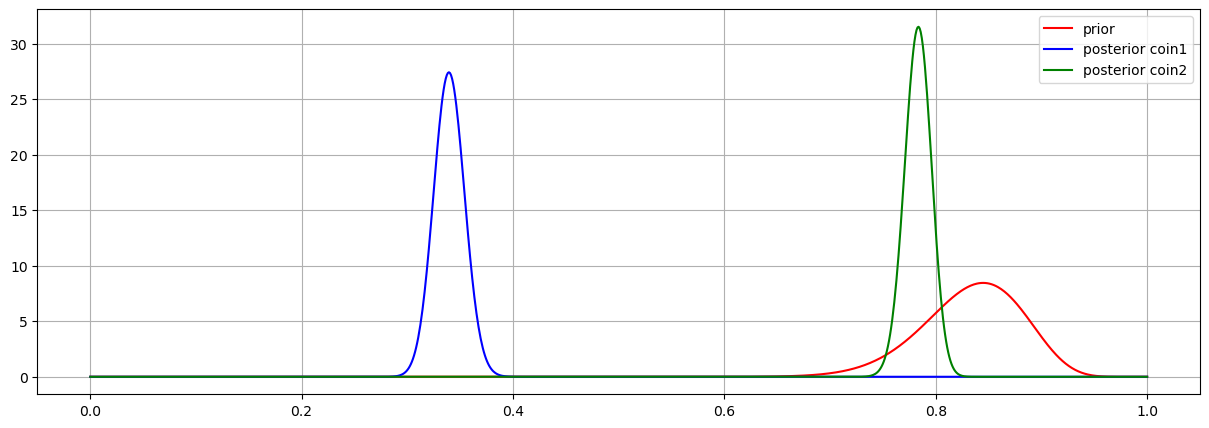

In [9]:
N = 1000

yN1, yN2 = coin1(N), coin2(N)

# Assume coins are biased

alpha1 = 50
beta1 = 10

# Compute the posterior 'gamma' and 'delta' parameters

gamma1, gamma2 = yN1 + alpha1, yN2 + alpha1
delta1, delta2 = beta1 + N - yN1, beta1 + N - yN2


plt.figure(figsize=(15,5))
x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, alpha1, beta1),'r', label='prior')
plt.plot(x, beta.pdf(x, gamma1, delta1),'b', label='posterior coin1')
plt.plot(x, beta.pdf(x, gamma2, delta2),'g', label='posterior coin2')
plt.legend()
plt.grid()
plt.show()

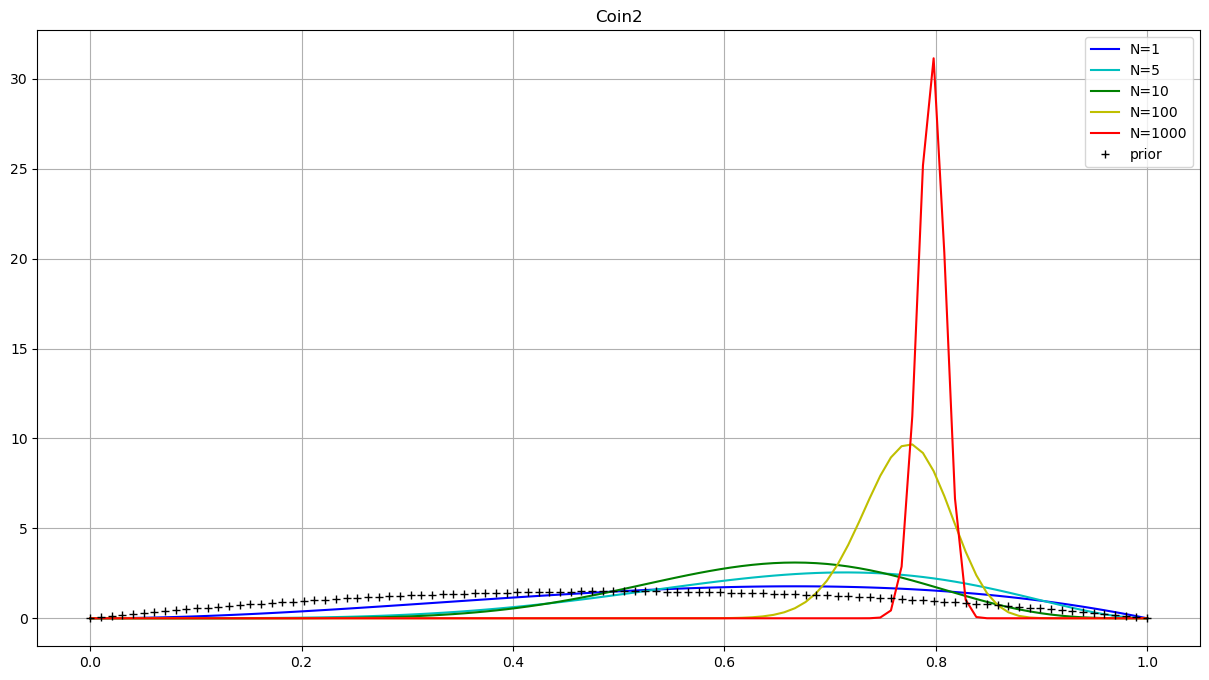

In [10]:
N = [1, 5, 10, 100, 1000]
cs = ['b', 'c', 'g', 'y', 'r']
a = 2
b = 2
x = np.linspace(0, 1, 100)
plt.figure(figsize=(15,8))
for i,n in enumerate(N):
    # Compute the posterior distribution for coin2 given 'n' tosses 
    yN2 = coin2(n)
    gamma = yN2 + a
    delta = b + n - yN2
    plt.plot(x, beta.pdf(x, gamma, delta), color=cs[i], label="N="+str(n))
    
plt.plot(x, beta.pdf(x, a, b), 'k+', label='prior')
plt.title("Coin2")
plt.legend()
plt.grid()
plt.show()

**Exercise:**
Repeat the previous exercise with a different set of prior parameter values ($\alpha$ and $\beta$). What
do you notice?


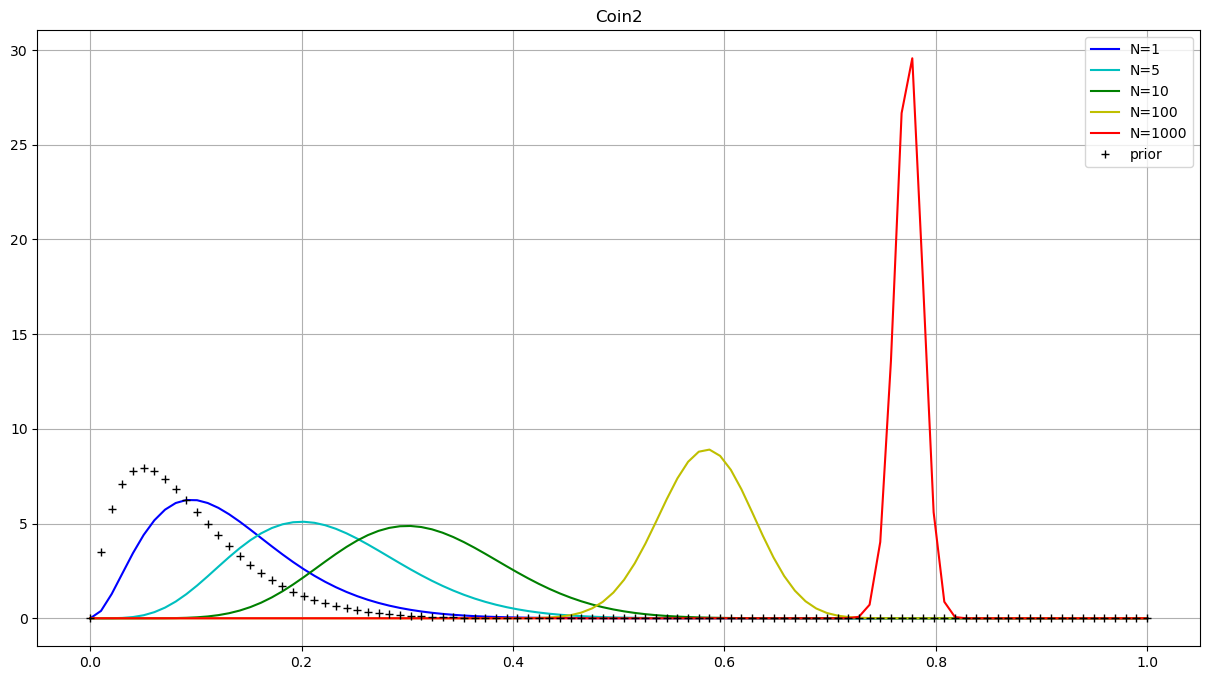

In [11]:
N = [1, 5, 10, 100, 1000]
cs = ['b', 'c', 'g', 'y', 'r']
a = 2
b = 20
x = np.linspace(0, 1, 100)
plt.figure(figsize=(15,8))
for i,n in enumerate(N):
    # Compute the posterior distribution for coin2 given 'n' tosses 
    yN2 = coin2(n)
    gamma = yN2 + a
    delta = b + n - yN2
    plt.plot(x, beta.pdf(x, gamma, delta), color=cs[i], label="N="+str(n))
    
plt.plot(x, beta.pdf(x, a, b), 'k+', label='prior')
plt.title("Coin2")
plt.legend()
plt.grid()
plt.show()

## Making predictions

`fairground()` is a coin game – you pay £1 to play. The stall owner tosses a coin ten times. If there are 6 or fewer heads, you win £2. The function returns 1 if you win and 0 if you lose.

**Exercise:** The probability that you win could be approximated by playing the game lots of times and computing the proportion of times you do win! By embedding fairground.m in a loop, approximate the probability that you will win in this way.


In [12]:
def fairground():
    return sum(np.random.random(10)<0.8) <= 6 # coin2

In [13]:
print("Approx Winning Probability:", sum([fairground() for i in range(10000)])/10000)

Approx Winning Probability: 0.1167



**Exercise:**  In the lectures, we derived an expression for the probability of getting $y_{new}$ heads in N tosses having observed $y_N$ heads in N tosses by taking an expectation with respect to the posterior.
Choose $\alpha$ and $\beta$ as you please (as long as you can justify your choice – do you know anything about this coin?). Use `coin2()` to generate $y_N$ for $N = 10$. Compute the posterior parameters. By using them, the expression from the lectures and the following identity, compute the probability that you will win given the coin tosses you have observed (i.e., you just need to add together a series of the expressions you derived in the lecture). 

Note that this quantity depends on the prior and the particular $y_N$ you get from `coin2()` and therefore could be quite different from the quantity computed in the previous question.
$$
P(y_{new}\le 6 \vert y_N, \alpha, \beta) = \sum_{a=0}^{6} P(y_{new}=a \vert y_N, \alpha, \beta)
$$


In [14]:
#unbiased coin
def coin2(N):
    return sum(np.random.random(N)<=0.5)

Nlook = 50 # the higher this number, the lower our winning probability
yN = coin2(Nlook)

# a normal prior is okay given the unbiased coin (on average I should receive 5/10 heads)
alpha1 = 50
beta1 = 50
gamma1 = yN + alpha1
delta1 = beta1 + Nlook - yN

N = 10
p_ynew_se_six = 0 # smaller or equal to 6
for ynew in range(7):
    # Compute probability using formula given in slides
    p = (comb(N,ynew)*
         ((gamma_func(gamma1+delta1))/(gamma_func(gamma1)*gamma_func(delta1)))*
         ((gamma_func(gamma1+ynew)*gamma_func(delta1+N-ynew))/(gamma_func(gamma1+delta1+N)))
         )
    p_ynew_se_six += p

print(p_ynew_se_six)

0.8201858055752087


In [15]:
# biased coin
def coin2(N):
    return sum(np.random.random(N)<=0.8)

Nlook = 50 # the higher this number, the lower our winning probability
yN = coin2(Nlook)

# need a strong losing prior given the biased coin
alpha1 = 2
beta1 = 100
gamma1 = yN + alpha1
delta1 = beta1 + Nlook - yN

N = 10
p_ynew_se_six = 0 # smaller or equal to 6
# summing the probability of obtaining 0, 1, 2, 3, 4, 5 heads (<= 6) and putting it as high as possible (to win more than I lose even given a biased 80% win coin)
for ynew in range(7):
    # Compute probability using formula given in slides
    p = (comb(N,ynew)*
         ((gamma_func(gamma1+delta1))/(gamma_func(gamma1)*gamma_func(delta1)))*
         ((gamma_func(gamma1+ynew)*gamma_func(delta1+N-ynew))/(gamma_func(gamma1+delta1+N)))
         )
    p_ynew_se_six += p

print(p_ynew_se_six)

0.9928611983556251
